In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [5]:
mass = pd.read_csv('./data/mass_mobile.csv')
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176,1
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000,1
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003,1
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711,57
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267,2


In [10]:
features = mass.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
       'crowddispersal', 'ignore', 'killings', 'shootings'])

X = features
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [26]:
km = KMeans(n_clusters=7, random_state=42)
km.fit(scaled_X)

KMeans(n_clusters=7, random_state=42)

In [27]:
km.cluster_centers_

array([[ 0.14018812, -0.18770743,  0.04165937, ...,  0.09454538,
        -0.08294462,  0.04128334],
       [-0.37865992, -0.1556891 ,  0.26121301, ..., -0.03591471,
        -0.04973847, -0.0023926 ],
       [-0.21332669, -0.06002257, -0.06092443, ..., -0.00565353,
         0.03700318, -0.06018749],
       ...,
       [ 0.09076054,  0.34752682,  0.0169332 , ..., -0.15668704,
         0.03649712,  0.16621674],
       [-0.0257552 ,  0.1092936 , -0.03781643, ..., -0.03096889,
         0.06272296, -0.05232118],
       [-0.3891428 , -0.3720653 ,  0.54392352, ..., -0.22040079,
        -0.37621229, -0.18178556]])

In [28]:
km.labels_

array([2, 2, 2, ..., 5, 5, 5])

In [29]:
km.predict(scaled_X)

array([2, 2, 2, ..., 5, 5, 5])

In [30]:
mass['cluster'] = km.labels_

In [34]:
cluster_2 = mass[mass['cluster']==2]

In [36]:
cluster_2['ignore'].value_counts(normalize=True)

1    0.590655
0    0.409345
Name: ignore, dtype: float64

In [19]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_), 
    columns=['protestnumber',
 'protesterviolence',
 'partipants_number',
 'pop_density',
 'prosperity_2020',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe',
 'region_Africa',
 'region_Asia',
 'region_Central America',
 'region_Europe',
 'region_MENA',
 'region_North America',
 'region_Oceania',
 'region_South America',
 'protest_size_category_1,000-4,999',
 'protest_size_category_10,000-100,000',
 'protest_size_category_100-999',
 'protest_size_category_5,000-9,999',
 'protest_size_category_50-99',
 'protest_size_category_Less than 50',
 'protest_size_category_Over 100,000',
 'protester_id_type_civil_human_rights',
 'protester_id_type_ethnic_group',
 'protester_id_type_locals_residents',
 'protester_id_type_pensioners_retirees',
 'protester_id_type_political_group',
 'protester_id_type_prisoners',
 'protester_id_type_protestors_generic',
 'protester_id_type_religious_group',
 'protester_id_type_soldiers_veterans',
 'protester_id_type_students_youth',
 'protester_id_type_victims_families',
 'protester_id_type_women',
 'protester_id_type_workers_unions',
 'labor_wage_dispute',
 'land_farm_issue',
 'police_brutality',
 'political_behavior_process',
 'price increases_tax_policy',
 'removal_of_politician',
 'social_restrictions'])
centroids

,protestnumber,protesterviolence,partipants_number,pop_density,prosperity_2020,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
0,3.150456,0.445289,1683.319909,66.819512,44.669255,7.372575e-18,-4.250073e-17,-2.602085e-17,1.823708e-02,-6.591949e-17,...,7.598784e-04,2.051672e-02,0.158815,0.186170,2.507599e-02,6.914894e-02,0.645137,9.878419e-02,1.033435e-01,3.039514e-02
1,5.690141,0.394366,7732.394366,188.723070,58.704806,2.168404e-18,-5.204170e-18,4.336809e-18,-1.517883e-18,5.204170e-18,...,1.301043e-18,1.408451e-02,0.197183,0.056338,2.081668e-17,5.633803e-02,0.732394,2.535211e-01,-1.387779e-17,1.408451e-02
2,14.438830,0.159574,12139.773936,235.995319,79.979991,-1.170938e-17,-2.688821e-17,3.642919e-17,1.257675e-17,1.821460e-17,...,-1.604619e-17,1.329787e-02,0.287234,0.098404,1.914894e-01,2.127660e-02,0.747340,4.255319e-02,2.393617e-02,4.787234e-02
3,6.873016,0.349206,7331.833333,84.495063,47.984285,2.168404e-18,-3.469447e-18,1.734723e-18,-1.301043e-18,2.602085e-18,...,1.301043e-18,3.174603e-02,0.103175,0.047619,1.587302e-02,1.984127e-01,0.690476,1.587302e-02,2.619048e-01,3.968254e-02
4,5.368852,0.098361,10791.967213,125.124254,69.139431,2.168404e-18,-9.540979e-18,-1.734723e-18,-1.951564e-18,1.127570e-17,...,1.734723e-18,2.459016e-02,0.573770,0.155738,3.278689e-02,8.196721e-03,0.754098,9.016393e-02,3.278689e-02,9.016393e-02
5,7.484444,0.128889,412.164444,2.501476,56.160685,-3.469447e-18,4.336809e-18,-1.561251e-17,-1.951564e-18,1.127570e-17,...,0.000000e+00,4.888889e-02,0.248889,0.208889,1.022222e-01,3.111111e-02,0.702222,6.222222e-02,1.022222e-01,9.777778e-02
6,7.992000,0.196000,561533.164000,151.480802,65.373270,2.168404e-18,4.000000e-03,-8.673617e-19,-4.336809e-19,2.000000e-02,...,4.336809e-19,1.200000e-02,0.380000,0.396000,8.000000e-03,6.400000e-02,0.696000,1.240000e-01,1.680000e-01,5.600000e-02
7,5.174312,0.247706,1990.642202,127.871330,53.579645,2.168404e-18,-1.301043e-17,2.602085e-18,-1.951564e-18,9.540979e-18,...,1.734723e-18,9.174312e-03,0.192661,0.137615,3.669725e-02,3.669725e-02,0.614679,2.293578e-01,2.385321e-01,-6.938894e-17
8,3.561151,0.100719,77917.985612,36.833504,58.193131,2.168404e-18,-4.336809e-18,-7.806256e-18,-2.168404e-18,1.214306e-17,...,1.734723e-18,1.438849e-02,0.561151,0.151079,2.158273e-02,2.158273e-02,0.877698,2.877698e-02,-1.387779e-17,7.194245e-03
9,11.839744,0.365385,13267.660256,146.055333,61.491736,-1.994932e-17,-1.908196e-17,2.862294e-17,1.019150e-17,1.821460e-17,...,3.205128e-03,-4.510281e-17,0.195513,0.086538,1.089744e-01,2.147436e-01,0.692308,2.884615e-02,1.346154e-01,8.012821e-02


ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 50.

<Figure size 504x504 with 0 Axes>

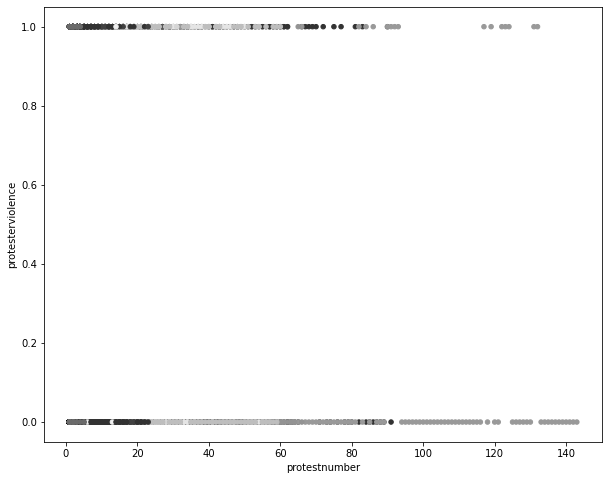

In [22]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
mass['color'] = mass['cluster']
ax = mass.plot(    
    kind="scatter", 
    x="protestnumber", y="protesterviolence",
    figsize=(10,8),
    c = mass['color']
)

centroids.plot(
    kind="scatter", 
    x="protestnumber", y="protesterviolence", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);